In [ ]:
https://github.com/mjamilmoughal/DataSciencePractices/blob/master/Exploratory%20Data%20Analysis%20with%20Titanic%20Dataset.ipynb 

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [79]:
titanic_traindata = pd.read_csv('D:/Users/452374/titanic_train.csv')
titanic_traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
titanic_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [81]:
titanic_traindata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
del titanic_traindata['PassengerId']
titanic_traindata.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
titanic_traindata.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Stanley, Mr. Edward Roland",male,1601,G6,S
freq,1,577,7,4,644


#### Explore features 

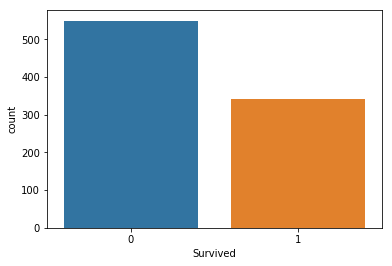

In [84]:
sns.countplot('Survived',data=titanic_train)
plt.show()

In [85]:
titanic_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

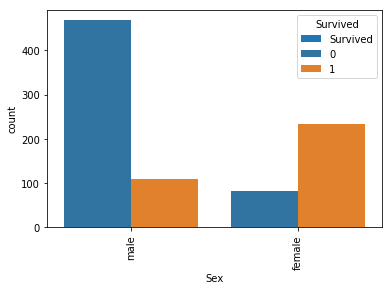

In [86]:
titanic_traindata[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=titanic_traindata)
plt.show()

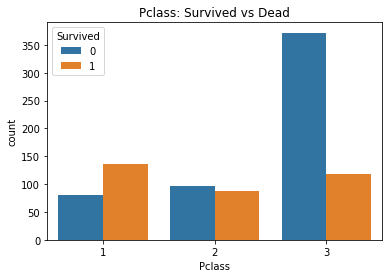

In [87]:
sns.countplot('Pclass',hue='Survived',data=titanic_traindata)
plt.title('Pclass: Survived vs Dead')
plt.show()

In [88]:
pd.crosstab([titanic_traindata.Sex,titanic_traindata.Survived],titanic_traindata.Pclass, margins=True).style.background_gradient(cmap='summer_r')

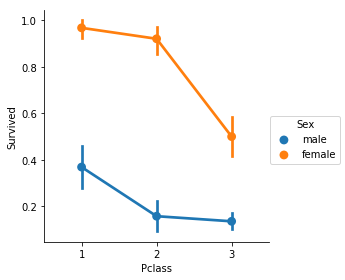

In [89]:
sns.factorplot('Pclass','Survived', hue='Sex',data=titanic_traindata)
plt.show()

In [90]:
print('Oldest person survived was of:', titanic_traindata['Age'].max())
print('Youngest person survived was of:',titanic_traindata['Age'].min())
print('Average person survived was of:',titanic_traindata['Age'].mean())

Oldest person survived was of: 80.0
Youngest person survived was of: 0.42
Average person survived was of: 29.69911764705882


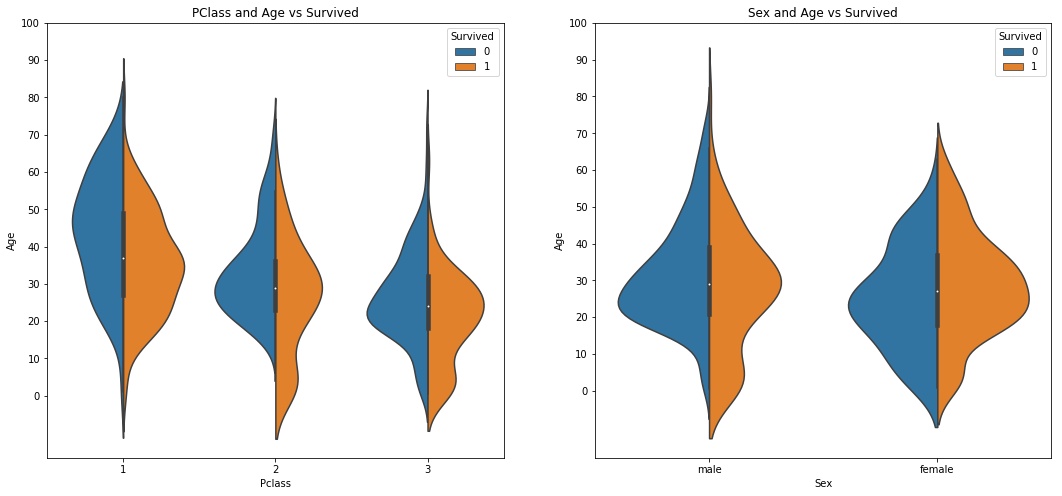

In [91]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=titanic_traindata, split=True, ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=titanic_traindata,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [92]:
# Look at 'Name' feature 
titanic_traindata['Initial']=0
for i in titanic_traindata: 
    titanic_traindata['Initial']=titanic_traindata.Name.str.extract('([A-Za-z]+)\.')

D:\Users\452374\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [93]:
pd.crosstab(titanic_traindata.Initial,titanic_traindata.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [94]:
titanic_traindata['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [95]:
titanic_traindata.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [96]:
# To fill in the empty age 
titanic_traindata.loc[(titanic_traindata.Age.isnull()) & (titanic_traindata.Initial=='Mr'),'Age']=33
titanic_traindata.loc[(titanic_traindata.Age.isnull()) & (titanic_traindata.Initial=='Mrs'),'Age']=36
titanic_traindata.loc[(titanic_traindata.Age.isnull()) & (titanic_traindata.Initial=='Master'),'Age']=5
titanic_traindata.loc[(titanic_traindata.Age.isnull()) & (titanic_traindata.Initial=='Miss'),'Age']=22
titanic_traindata.loc[(titanic_traindata.Age.isnull()) & (titanic_traindata.Initial=='Other'),'Age']=46

In [98]:
titanic_traindata.Age.isnull().any()

False

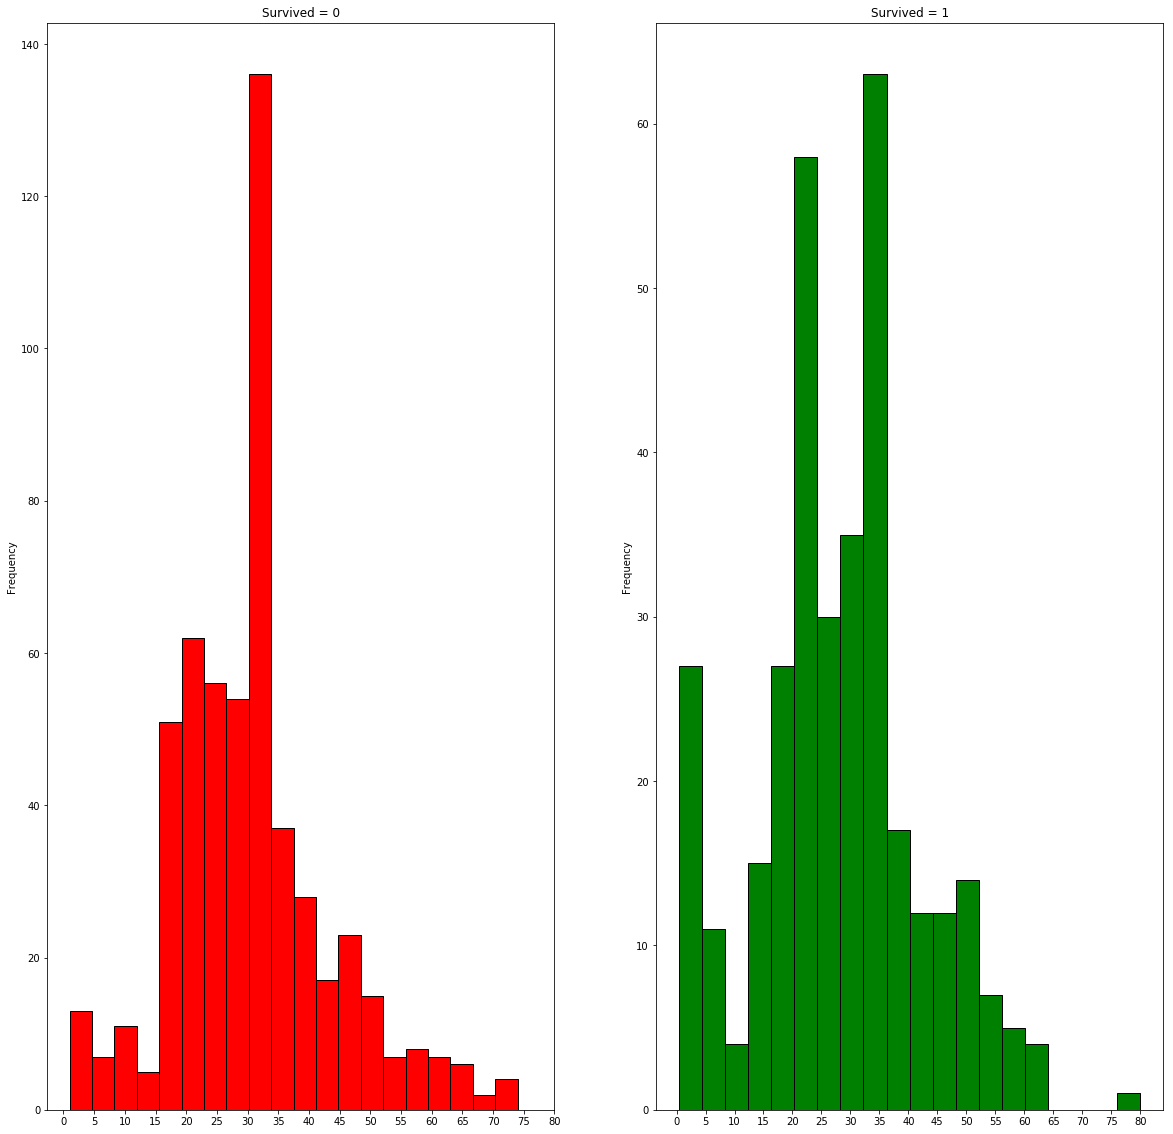

In [104]:
f,ax=plt.subplots(1,2,figsize=(20,20))
titanic_traindata[titanic_traindata['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
x1=list(range(0,85,5))
ax[0].set_title('Survived = 0')
ax[0].set_xticks(x1)
titanic_traindata[titanic_traindata['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x2)
plt.show()

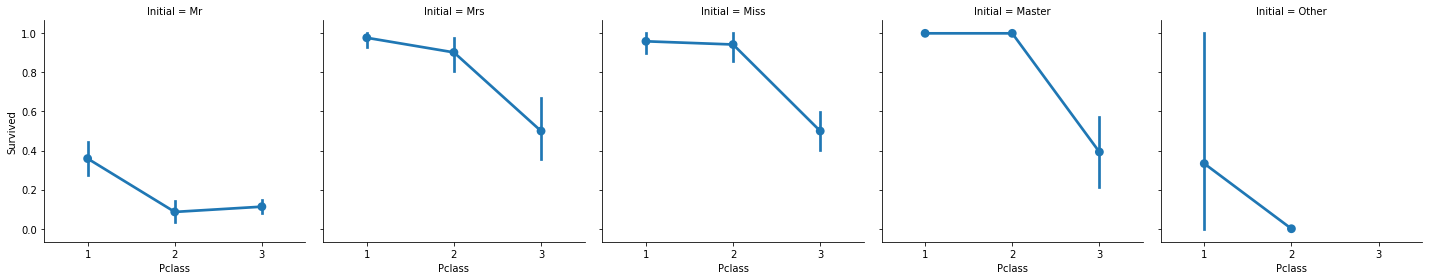

In [105]:
sns.factorplot('Pclass','Survived',col='Initial',data=titanic_traindata)
plt.show()

### Feature: SibSip

In [108]:
pd.crosstab([titanic_traindata.SibSp],titanic_traindata.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0
